# Introduction

##### In this tutorial, we will learn how to process EEG signals with Python using the MNE-Python library.

[MNE Documentation](https://mne.tools/dev/auto_tutorials/intro/30_info.html#tut-info-class)


## Table of Contents

- Introduction to EEG
- Installation/Setup
- Loading data
- Plotting EEG Signals
- Preprocessing
- Epoching
- Conclusion

# Introduction to EEG
Electroencephalography (EEG) is a technique for continuously recording brain activity in the form of brainwaves. EEG is commonly used because it provides a noninvasive, easy, and inexpensive method to measure neural activity at a high resolution.

EEG analysis is used a lot in evaluating brain disorders, especially epilepsy or other seizure disorders. It is also used in brain-computer interfaces (BCIs).

EEG signals can be seen as a time series, since EEG recordings measure brain activity over a specific time period.

EEG devices are composed of different electrodes that are placed on the scalp. These electrodes are represented as channels using a montage. There are different types of montages. A typical EEG system can have 1 to 256 channels. These channels are named based on their locations on the scalp.

# Installation/Setup
In this article, we will be using the MNE-Python library. It contains a lot of tools and algorithms we can use to easily analyze EEG/MEG recordings.

We can install MNE by using the following pip command:

In [ ]:
pip install mne


**NumPy will also need to be installed:**



In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


## Import necessary modules/libraries:


In [5]:
import os
import numpy as np
import mne

# Working with EEG Data
## Loading data
The MNE package supports various EEG file formats, including the following:

- European data format (.edf)
- EGI simple binary (.egi)
- EEGLAB set files (.set)

MNE has a sample dataset that we can use to become familiarized with processing EEG files. The below code shows how we can read a sample MEG/EEG file. There are different methods for different file formats. Since the sample file has the .fif extension, we call the read_raw_fif method. Also, since we are specifically focusing on EEG channels, we can exclude all non-EEG channels by using the pick_types method.

In [7]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')


Opening raw data file /Users/ashishchaudhary/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


#### This creates a Raw object 

We can inspect this Raw object by printing the info attribute (a dictionary-like object):

In [8]:
print(raw.info)


<Info | 14 non-empty values
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>


**The info attribute keeps track of channel locations, recording date, number of channels, and more. Further detailed information on the Info structure can be found on MNE documentation.**

## Cropping Data
MNE Raw objects have a crop method that can be used to limit the data from the raw file to be between specific times (in seconds). This can help save memory.

In [9]:
raw.crop(0, 60) # keeps the first minute of data and discards the rest


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 9010 (60.0 s), ~2.9 MB, data not loaded>

# Plotting EEG Signals
MNE has several methods to plot Raw objects. Here's one to generate a plot of the raw data:

Using matplotlib as 2D backend.


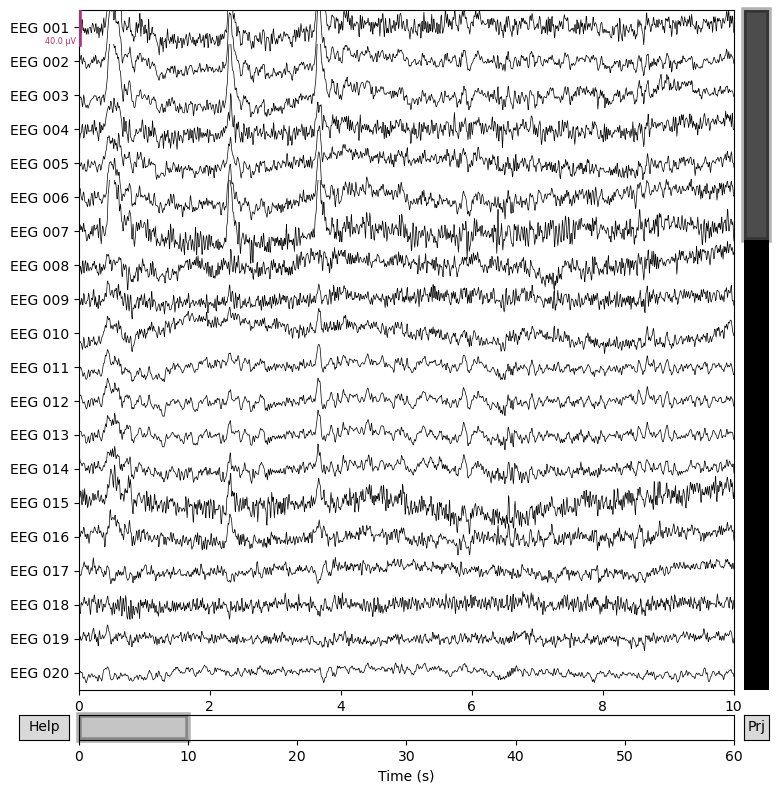

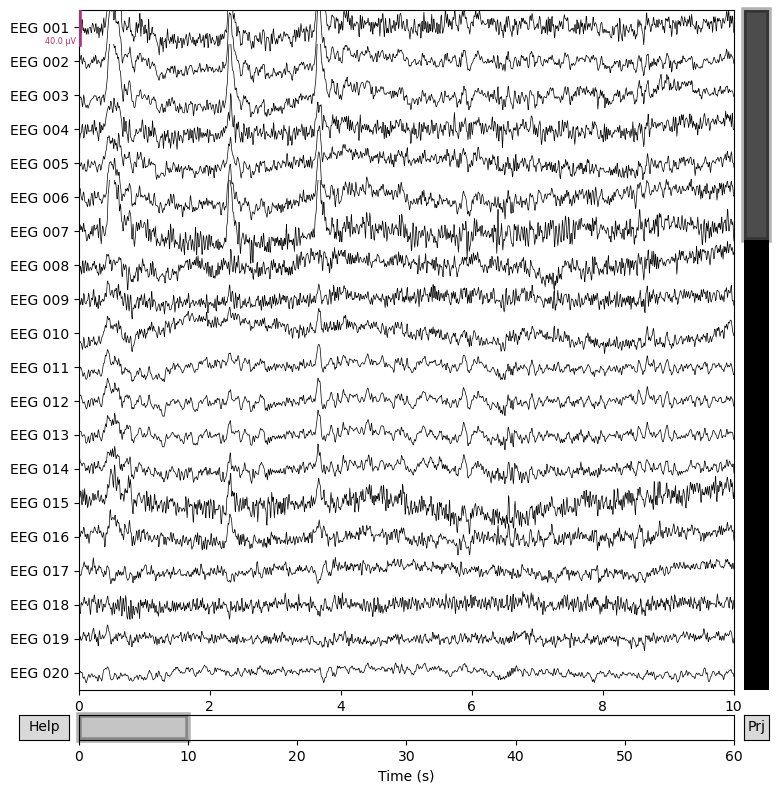

In [10]:
raw.plot()


**We can also plot the Power Spectral Density (PSD) for each channel. PSD shows the power as a function of frequency and is measured in power per unit frequency. It shows at which frequencies variations are strong as well as at which frequencies variations are weak.**

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


/Users/ashishchaudhary/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


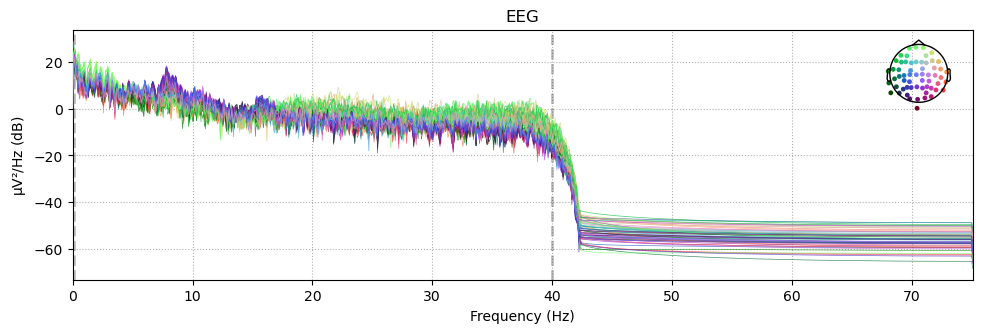

In [11]:
raw.plot_psd()


**In interactive Python sessions, plot functions create interactive plots. These allow for scrolling, scaling, annotations, and more.**

# Preprocessing
### Resampling
EEG recordings have a high temporal resolution, so they are often recorded at high sampling rates (eg. 1000 Hz or higher). Although this makes the recordings very precise, it also consumes more memory. In cases where highly precise timing is not needed, downsampling the EEG signal can help save a lot of computation time.

Raw objects have a resample method that can be used to convert from one sample rate to another:

In [8]:
raw.resample(600) #resamples to a rate of 600 Hz


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

# Filtering
EEG data can have various artifacts and noise, so preprocessing must be done in order to maximize the signal-to-noise ratio (SNR), which measures the ratio of the signal power to the noise power.

Filtering is one of several techniques used for noise reduction/artifact removal.

Raw objects have a filter method that takes two arguments - lfreq represents the lower pass-band edge, and hfreq that represents the upper pass-band edge.

# High-pass filtering
High-pass filtering attenuates frequencies below a certain cutoff frequency. The rest of the signal remains unchanged.

The code below filters the signal attenuates the signal below 1 Hz and leaves the rest of the signal unchanged. Since hfreq is None, there is no upper pass-band edge, so the signal is high-passed.

In [9]:
raw.filter(1., None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1981 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.1s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

# Low-Pass Filtering
Low-pass filtering is essentially the opposite of high-pass filtering. Instead of attenuating parts of the signal below a certain frequency, it attenuates parts of the signal above a certain frequency. It's called low-pass because it lets frequencies lower than a certain cutoff pass.

The code below attenuates the parts of the signal above 50 Hz and leaves the rest unchanged. Since lfreq is None, there is no lower pass-band edge, so the signal is low-passed.



In [10]:
raw.filter(None, 50.)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 159 samples (0.265 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.1s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

# Notch Filter (Band Stop Filter)
The notch filter is a combination of both low-pass and high-pass filters. It can attenuate signals within a specific range of frequencies. The range of frequencies that a band-stop filter attenuates is called the stopband.

Raw objects have a notch_filter method that takes in a specific frequency or a list of frequencies to attenuate the signal at.

In [11]:
raw.notch_filter(60)


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3961 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.1s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

**This above example, attenuates the signal at 60 Hz.**

**Notch filters are often used when removing power-line noise, which occurs at a frequency of 50 or 60 Hz depending on the recording location. There may be peaks found at the harmonic frequencies (the integer multiples of the the power-line frequency, eg. 60, 120, 180, etc).**

**We can apply the notch filter to each of these frequencies by using the numpy.arange method. It turns an array of evenly spaced values between the start (inclusive) and stop (exlusive) parameters it takes. These evenly spaced values have a distance of step between each other, which is another parameter numpy.arange takes.**

**The below code will attenuate the parts of the signal with frequencies 60, 120, 180, and 240.**

In [12]:
# the first 60 is start (inclusive), 241 is stop (exlusive), and 60 is step
raw.notch_filter(np.arange(60, 241, 60)) 


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3961 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.1s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

# PythonCopy
Epoching
Epochs are equal-length segments of data extracted from continuous EEG data. Usually, epochs are extracted around stimulus events or responses, but sometimes sequential or overlapping epochs are used.

MNE has an Epochs object used to represent epoched data. Epochs objects are used in other steps of EEG analysis, including feature extraction, which is used in machine learning.

In order to create epoched data, MNE-Python requires a Raw object as well as an array of events.

# Events
Events in MNE provide a mapping between specific times during an EEG/MEG recording and what happened at those times. Events are stored as a 2-dimensional NumPy array.

There are two ways to create events: reading from a file/Raw object or creating equal-sized events.

# Reading events
We will be using a different sample recording because the one we were originally using does not contain any events.

In [13]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)


**The following code reads events from a Raw object:**

In [14]:
events = mne.find_events(raw)


320 events found
Event IDs: [ 1  2  3  4  5 32]


# Creating equal-length events
Sometimes, there may not be any events included in the raw EEG recording. In such cases, an array of equally-spaced events can be generated. The code below creates second-long events for the first 10 seconds of EEG data:

In [15]:
events = mne.make_fixed_length_events(raw, start=0, stop=10, duration=1.)


**To create events that overlap by a certain duration, we can specify this duration using the overlap parameter in our call to the make_fixed_length_events method:**

In [16]:
events = mne.make_fixed_length_events(raw, start=0, stop=10, duration=1., overlap=0.5)


# Creating Epoched Data from Events
After loading/creating events, creating an Epochs object is fairly simple:

In [17]:
epochs = mne.Epochs(raw, events, preload=True).pick_types(eeg=True)


Not setting metadata
19 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 19 events and 421 original time points ...
1 bad epochs dropped
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


**preload=True loads all epochs from disk when creating the Epochs object.**

# Selecting Epochs
Now that we have the Epochs object with event labels, we can select epochs using square brackets.

For example, we can plot the epochs where the event label was '1' (these event labels have an actual meaning, but they are not shown here for simplicity):

Using matplotlib as 2D backend.


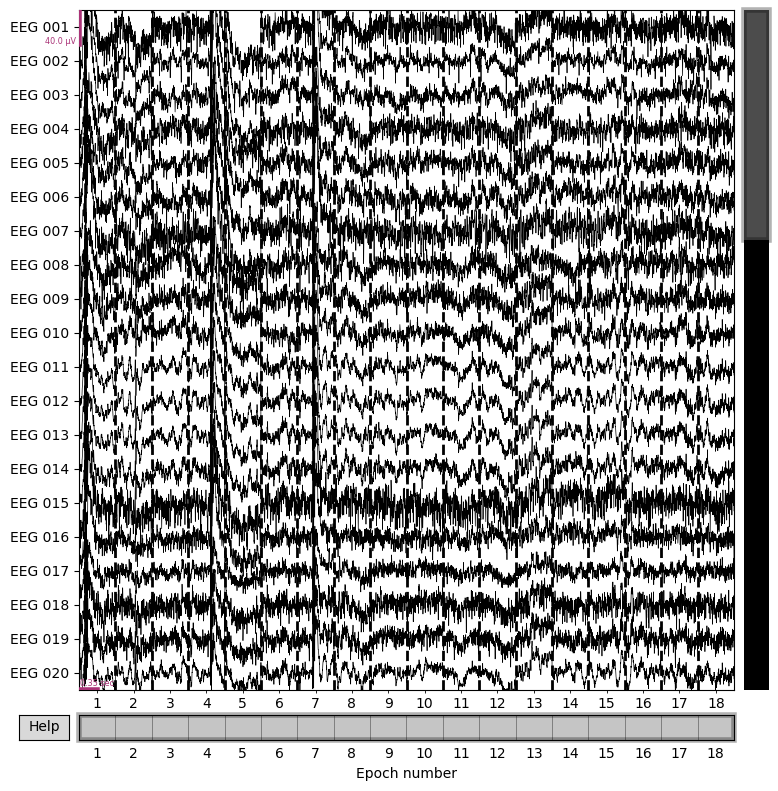

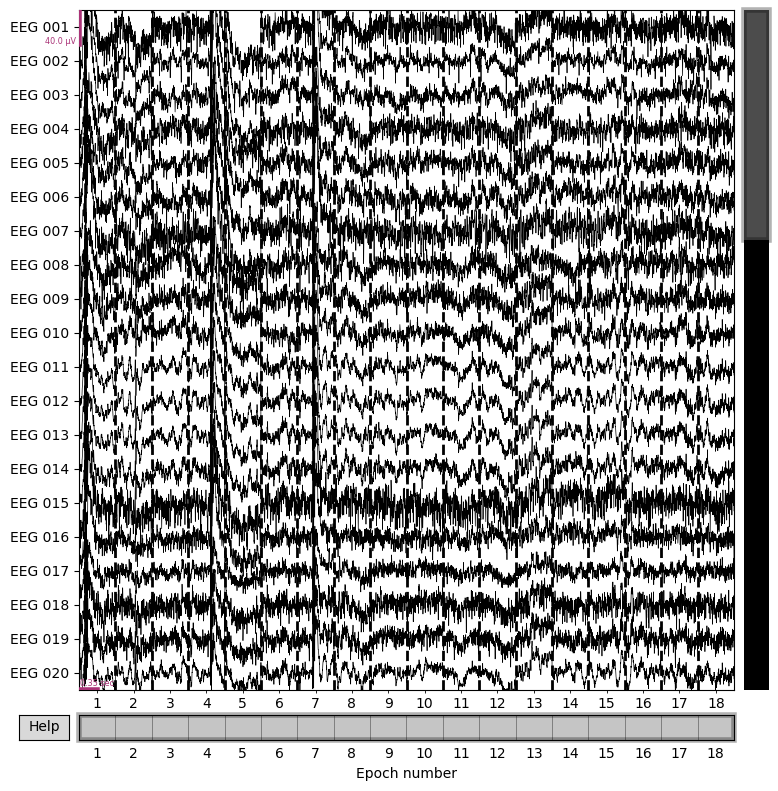

In [18]:
epochs['1'].plot()


# Conclusion
In this Tutorial, we learned about EEG signals, how they can be loaded, analyzed, preprocessed, and more. Understanding how to process EEG signals is very helpful for tasks that build on top of it - one important example of this is training a machine learning model to classify EEG segments.

